In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [3]:
df = pd.read_excel('../experimental-data/co2_data_Jahn2018.xlsx')

In [4]:
df

,date,experiment,strain,plasmid,light,medium,co2,replicate,t_for_mu_start [h],t_for_mu_end [h],...,mu_determination,mu_mean,mu_sd,mu_CV %,tD,tR,mu_mean_4_replicates,ChlA,Phyco,Carot
0,2017-02-10,light limitation,Synechocystis sp. PCC6803,NaN,1000,BG11,1.0,1,260,330,...,"6 point interval, R2=0,95",0.1020,0.0086,8.4,6.80,9.80,0.0961,1.287487,1.366429,1.484028
1,2017-02-10,light limitation,Synechocystis sp. PCC6803,NaN,1000,BG11,1.0,2,260,330,...,"6 point interval, R2=0,95",0.0927,0.0135,14.6,7.48,10.79,NaN,1.294354,1.368381,1.477290
2,2017-02-10,light limitation,Synechocystis sp. PCC6803,NaN,1000,BG11,1.0,3,260,330,...,"6 point interval, R2=0,95",0.0842,0.0090,10.7,8.23,11.88,NaN,1.303436,1.373494,1.495984
3,2017-02-10,light limitation,Synechocystis sp. PCC6803,NaN,1000,BG11,1.0,4,260,330,...,"6 point interval, R2=0,95",0.1056,0.0165,15.6,6.56,9.47,NaN,1.295024,1.399220,1.506537
4,2017-02-10,light limitation,Synechocystis sp. PCC6803,NaN,500,BG11,1.0,1,260,330,...,"6 point interval, R2=0,95",0.1171,0.0164,14.0,5.92,8.54,0.1058,1.377175,1.437924,1.437039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2017-05-24,perturbation,Synechocystis sp. PCC6803,NaN,60,BG11+DCMU 0.2 uM,1.0,4,170,450,...,"auto interval, R2=0,95",0.0183,0.0016,8.7,37.88,54.64,NaN,1.489013,1.620647,1.450871
76,2017-11-10,perturbation,Synechocystis sp. PCC6803,pJA8-eYFP,60,BG11+Kan 25 ug/mL,1.0,1,175,475,...,"auto interval, R2=0,95",0.0269,0.0016,5.9,25.77,37.17,0.0257,1.524036,1.549555,1.399407
77,2017-11-10,perturbation,Synechocystis sp. PCC6803,pJA8-eYFP,60,BG11+Kan 25 ug/mL,1.0,2,175,475,...,"auto interval, R2=0,95",0.0269,0.0015,5.6,25.77,37.17,NaN,1.519932,1.536446,1.386105
78,2017-11-10,perturbation,Synechocystis sp. PCC6803,pJA8-eYFP,60,BG11+Kan 25 ug/mL,1.0,3,175,475,...,"auto interval, R2=0,95",0.0244,0.0029,11.9,28.41,40.98,NaN,1.530833,1.535000,1.393333


In [7]:
df2=df.loc[(df.medium=='BG11') & (df.light==300),['co2','mu_mean']]

In [13]:
data=df2.groupby('co2').mean().reset_index()

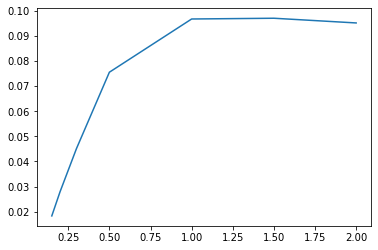

In [17]:
plt.plot(data.co2,data.mu_mean)

In [11]:
data.max()

mu_mean    0.097125
dtype: float64

In [54]:
def func(co2,kco2,mu_max):
    return mu_max * (co2/( kco2 + co2))
popt,pcov = curve_fit(func,data.co2,data.mu_mean)

In [26]:
popt

array([0.26478612])

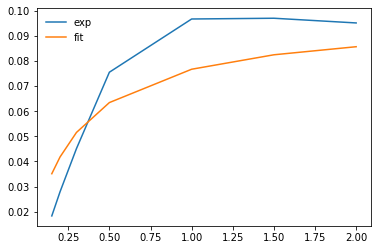

In [27]:
f, ax =plt.subplots()
ax.plot(data.co2,data.mu_mean,label='exp')
ax.plot(data.co2,func(data.co2,*popt),label='fit')
ax.legend(frameon=False)

In [46]:
kh=29.41 #atm/M
co2mw=43.99
co2=[i/kh for i in data.co2/100]

In [47]:
data['co2M']=data.apply(lambda x: x['co2']/100/kh,axis=1)
data['co2gL']=data.co2M*co2mw

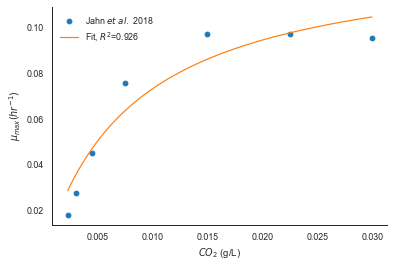

In [73]:
popt,pcov = curve_fit(func,data.co2gL,data.mu_mean)
xrange = np.linspace(data.co2gL.min(),data.co2gL.max())
r2=r2_score(data.mu_mean,func(data.co2gL,*popt))
sns.set_context('paper')
sns.set_style('white')
f, ax =plt.subplots()
ax.plot(data.co2gL,data.mu_mean,label=r'Jahn $\it{et}$'+ ' ' + '$  \it{al.}$ 2018',marker='o',ls='')
ax.plot(xrange,func(xrange,*popt),label=f'Fit, $R^2$={r2:.3f}')
ax.legend(frameon=False)
ax.set_xlabel(r'$CO_2$ (g/L)')
ax.set_ylabel(r'$\mu_{max} (hr^{-1})$')
sns.despine()
f.savefig(r'../figures/mu_max fit.png',bbox_inches='tight',dpi=600)

In [57]:
popt

array([0.00812672, 0.13285844])

0.9262419280976321